Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
Instantiating visualizer


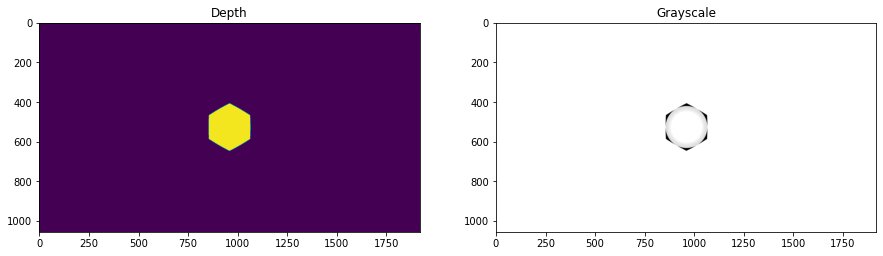

In [2]:
# read in untransformed bolt
# The untransformed location of the bolt is such that the center of the head is at 0,0,0
# and it is pointing in the direction and centered on the positive x axis.
# For example, rotating it around the z axis 90 degrees will make it appear pointing left
from utility.pose_data import get_bolt_depthimage, show_depthimage, make_pointcloud, get_random_transform
from utility.transformation_matrix import TransformationMatrix
from utility.visualizer import visualizer as vis

depthimage = get_bolt_depthimage()
show_depthimage(depthimage)

x=0.0, y=0.0, z=0.0
x_rotate=90.0°, y_rotate=0.0°, z_rotate=0.0°


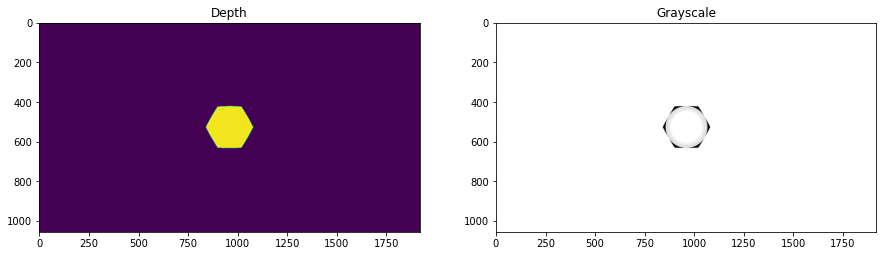

In [3]:
transform = TransformationMatrix.from_xyzwpr([0,0,0,90,0,0])
print(transform)
depthimage = get_bolt_depthimage(transform)
show_depthimage(depthimage)

x=5.9, y=4.53, z=18.43
x_rotate=0.0°, y_rotate=-18.14°, z_rotate=0.79°


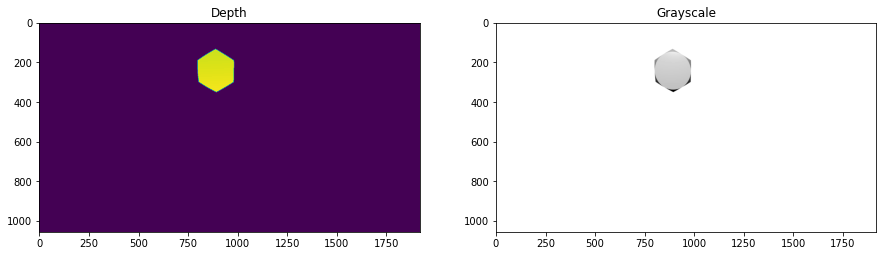

Now I'm a point cloud. Try moving me around!


In [4]:
transform = get_random_transform()
print(transform)
depthimage = get_bolt_depthimage(transform)
show_depthimage(depthimage)
pcd = make_pointcloud(depthimage)
print('Now I\'m a point cloud. Try moving me around!')
vis.draw_geometries([pcd], moveable=False)

Truth
x=60.0, y=60.0, z=0.0
x_rotate=0.0°, y_rotate=0.0°, z_rotate=0.0°
[array([1., 0., 0.]), array([ 6.37796082e+01,  5.86096737e+01, -4.64377793e-02])]


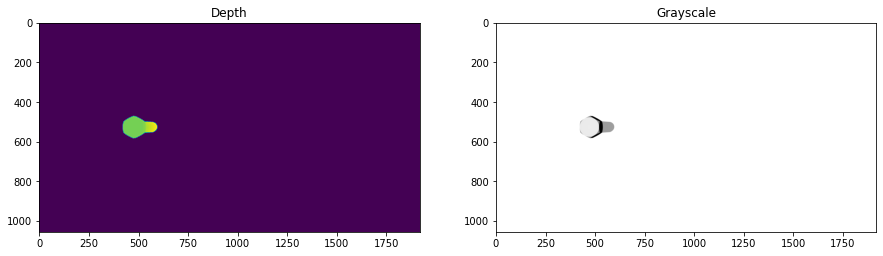


Estimate
x=63.78, y=58.61, z=-0.05
x_rotate=0.0°, y_rotate=0.0°, z_rotate=0.0°

Error: 1.644

x=60.0, y=60.0, z=0.0
x_rotate=0.0°, y_rotate=0.0°, z_rotate=0.0°
x=63.78, y=58.61, z=-0.05
x_rotate=0.0°, y_rotate=0.0°, z_rotate=0.0°



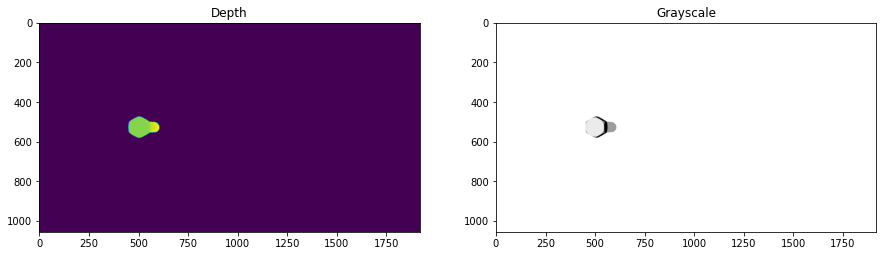

In [13]:
import numpy as np
from scipy.spatial.transform import Rotation as R

def rotation_between_vectors(u, v):
    # u and v are both 3D unit vectors
    axis = np.cross(u, v)
    unit = axis / np.linalg.norm(axis)
    angle = np.arccos(np.dot(u, v))
    rotvec = unit * angle
    return R.from_rotvec(rotvec)

def estimator(transformed_depthimage, debug=False):
    #orig_normal = np.array([1,0,0]) # the bolt head is initially pointed in the x direction
    orig_center = np.array([0,0,0]) # the bolt head is initially centered at 0,0,0

    trns_pcd = make_pointcloud(transformed_depthimage)
    trns_center = trns_pcd.get_center()
    translation = (trns_center - orig_center)
    #print('\n Translation : ',translation,end='\n')
    rot = np.zeros(3) # dummy values
    rot[0] = 0 # the rotation in x_rotate will always be 0 because I made that constraint
    rot = R.from_euler('xyz', rot).as_matrix()
    print([rot[0], translation])
    return TransformationMatrix.compose(rot, translation)

def estimator1(transformed_depthimage, debug=False):
    #orig_normal = np.array([1,0,0]) # the bolt head is initially pointed in the x direction
    orig_center = np.array([0,0,0]) # the bolt head is initially centered at 0,0,0

    trns_pcd = make_pointcloud(transformed_depthimage)
    trns_center = trns_pcd.get_center()
    translation = (trns_center - orig_center)
    #print('\n Translation : ',translation,end='\n')
    rot = np.zeros(3) # dummy values
    rot[0] = 0 # the rotation in x_rotate will always be 0 because I made that constraint
    rot = R.from_euler('xyz', rot).as_matrix()
    info = TransformationMatrix.compose(rot, translation)
    print(info.rotation_euler.round(2))
    return info

transform = TransformationMatrix.from_xyzwpr([60,60,0,0,0,0])

print('Truth')
print(transform)
transformed = get_bolt_depthimage(transform)
#print('S\n\n',transformed[1],end='\n\n E')
transformed_pcd = make_pointcloud(transformed)
estimate = estimator(transformed, debug=False)

show_depthimage(transformed)

vis.draw_geometries([transformed_pcd], moveable=False)

transformed = get_bolt_depthimage(estimate)
transformed_pcd = make_pointcloud(transformed)

#print(estimator1(transformed, debug=False))
print('\nEstimate')
print(estimate)
from utility.pose_estimation import transform_error, evaluate_random
print('\nError:', transform_error(estimate, transform).round(3))

print()
print(transform)

print(estimate)
print()

show_depthimage(transformed)

vis.draw_geometries([transformed_pcd], moveable=False)



In [11]:
# you can use this convience function to get the loss on a random transformation
evaluate_random(estimator) 

[array([1., 0., 0.]), array([ 10.54892127, -41.80503643,   0.21805927])]


1.719406853940249

In [10]:
import os
os.environ["DISCORD_USERNAME"] = "Goof Josh#6128"

In [11]:
from utility.pose_estimation import make_submission, test_images
from tqdm import tqdm

print('Estimating transformations')
estimates = np.array([estimator(img) for img in tqdm(test_images)])
make_submission(estimates)

Estimating transformations


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:06<00:00, 32.87it/s]


Mean rmse=6.6223
Your ranking: #39

In [23]:
from utility.scoring_client import get_highscores, get_myscores, Challenge
get_highscores(Challenge.POSE)

Your Ranking: #120
                       score
name                        
"kxrider"         -14.555914
'Goof Josh        -14.555914
'gust141999       -14.555914
CapnCrunch        -14.555914
Catherine Duong    -6.615265
Fxnchy             -6.679010
Goof Josh          -6.622292
Haoshen           -14.555914
Josiah            -14.555914
Katherine_Stevens  -6.679010
Legolas           -14.555914
Mavert            -14.555914
Seth Hamilton      -6.679010
Srujana           -14.555914
THANOS            -14.555914
YoungBreezy       -14.555914
ananththebunth     -6.622292
bhanu             -14.555914
conor              -0.847131
danbeltran         -6.622292
fardeenmozumder    -6.632729
josiah             -6.615265
kxrider            -6.679010
marbhic            -6.679010
mashedpotatoes    -14.555914
nebula             -6.679010
shrey              -0.828750
stark              -6.617889

In [10]:
get_myscores(Challenge.POSE)

[-6.622291525556609, -6.622291525556609]

# Robot Control Challenge

In [11]:
from utility.remote_env import RobotorqueEnvironment

env = RobotorqueEnvironment(Challenge.ROBOT)
state = env.reset()
history = []
for _ in tqdm(list(range(10))):
    robot_positions = [state['bolt_pose'].translation[1]] * env.CONTROLS_PER_CAPTURE
    state, reward, done, info = env.step(robot_positions)
    info['rewards'] = reward
    history.append(info)

import pandas as pd
df = pd.DataFrame(history).round(3)
print(df)
print('Total Reward:', df.rewards.sum().round(1))
if done:
  print('Ranking', info['ranking'])


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  7.43it/s]

   bolt position         robot visited positions  time  rewards
0          9.408  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]  0.02    0.000
1         -7.270  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]  0.04    0.000
2         -2.996  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]  0.06    2.004
3         11.403  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]  0.08    0.000
4         -3.352  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]  0.10    1.648
5         -4.716  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]  0.12    0.284
6         13.241  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]  0.14    0.000
7          2.381  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]  0.16    2.619
8         -4.740  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]  0.18    0.260
9         14.857  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]  0.20    0.000
Total Reward: 6.8


In [8]:
import csv

f = open('data.csv','w')
actual = []
information = []
for x in range(0, 1000):
    transform = get_random_transform()
    actual.append(transform)
    transformed = get_bolt_depthimage(transform)
    information.append(transformed)
f.close()

KeyboardInterrupt: 

In [ ]:
print(actual)
print(information)